In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# 11.2.2
- Simple linear model

In [2]:
whisky_data = pd.DataFrame({'year':[0,0.5,1,2,3,4,5,6,7,8], # x-value
                           'proof': [104.6, 104.1, 104.4, 105, 106, 106.8, 107.7, 108.7, 110.6, 112.1] }) # y-value
whisky_data

,year,proof
0,0.0,104.6
1,0.5,104.1
2,1.0,104.4
3,2.0,105.0
4,3.0,106.0
5,4.0,106.8
6,5.0,107.7
7,6.0,108.7
8,7.0,110.6
9,8.0,112.1


In [3]:
def fit (x, y):
        n = len(x)
        sum_x = sum(x)
        sum_y = sum(y)
        sum_xy = sum(x * y)
        sum_xsquare = sum(x**2)
        slope = (n * sum_xy - sum_x*sum_y) / ( n * sum_xsquare - sum_x**2)
        intercept = (sum_y/n) - slope * (sum_x/n)
        return slope, intercept

In [4]:
x = whisky_data.year
y = whisky_data.proof
fit(x,y)

(0.9552974304822246, 103.51316437873989)

In [5]:
def predict(x, y):
    y_pred = []
    slope, intercept = fit(x,y)
    for i in range(len(x)):
        pred =  intercept + slope * x
    y_pred.append(pred)
    return np.reshape(y_pred,(-1,1))


In [6]:
y_pred = predict(x,y)

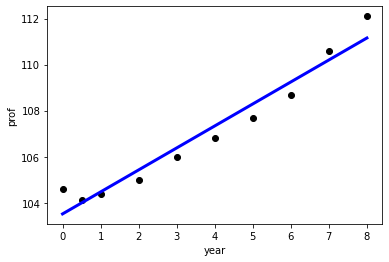

In [7]:
plt.scatter(x,y, color='black')
plt.plot(x, y_pred, color = 'blue', linewidth = 3)
plt.xlabel('year')
plt.ylabel('prof')
plt.style.use('default')

# 11.2.8
- Simple linear model and residual plot

In [8]:
bird_data = pd.DataFrame(({'plant': [0.9, 0.76, 1.67, 1.44, 0.2, 0.16, 1.12, 1.04, 0.48, 1.33, 1.10, 1.56, 1.15], # x
                          'bird': [1.8, 1.36, 2.92, 2.61, 0.42, 0.49, 1.9, 2.38, 1.24, 2.8, 2.41, 2.8, 2.16]})) # y
bird_data

,plant,bird
0,0.90,1.80
1,0.76,1.36
2,1.67,2.92
3,1.44,2.61
4,0.20,0.42
5,0.16,0.49
6,1.12,1.90
7,1.04,2.38
8,0.48,1.24
9,1.33,2.80


In [9]:
x = bird_data.plant
y = bird_data.bird
fit(x,y)

(1.7026010749789562, 0.2545707786170519)

In [10]:
y_pred = predict(x,y)

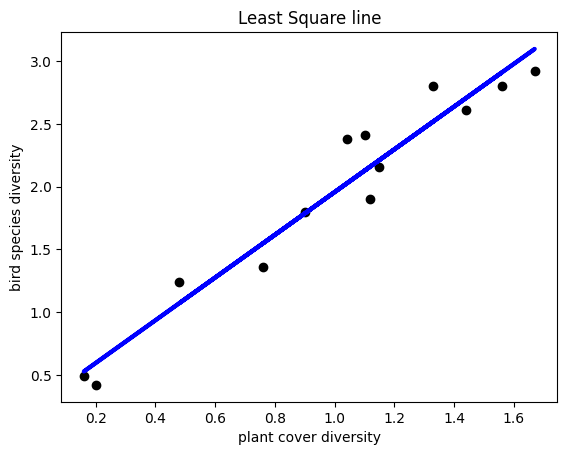

In [11]:
plt.scatter(x,y, color='black')
plt.plot(x, y_pred, color = 'blue', linewidth = 3)
plt.title('Least Square line')
plt.xlabel('plant cover diversity')
plt.ylabel('bird species diversity')
plt.style.use('default')

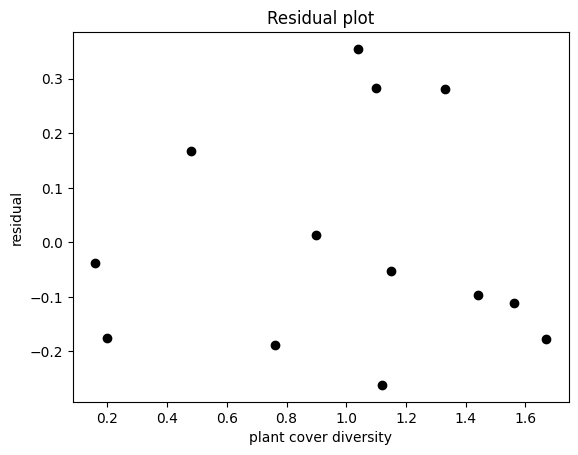

In [12]:
residual = y - y_pred.flatten()
plt.scatter(x, residual, color = 'black')
plt.title('Residual plot')
plt.xlabel('plant cover diversity')
plt.ylabel('residual')
plt.style.use('default')

From the plot above, there residual plot has no obvious pattern. We conclude that fitting this data to a straight line is approporiate

# 11.2.22
 Fit data with a model of the form $y=ae^{bx}$

In [13]:
car_data = pd.DataFrame({'age':np.arange(1,11), # x value, age in year
                            'price': [14680, 12150, 11215, 10180, 9230, 8455, 7730, 6825, 6135, 5620]})

In [14]:
x = car_data.age
y = car_data.price

In [15]:
def fit (x, y):
        n = len(x)
        sum_x = sum(x)
        ln_y = np.log(y)
        sum_xy = sum(x*ln_y)
        sum_xsquare = sum(x**2)
        b = (n * sum_xy- sum_x*sum(ln_y)) / ( n * sum_xsquare - sum_x**2)
        ln_a = (sum(ln_y) - b * sum_x)/n
        return b, np.exp(ln_a)

In [16]:
fit(x,y)

(-0.10194891830989064, 15474.512034532483)

In [17]:
def predict(x, y):
    y_pred = []
    b, a = fit(x,y)
    for i in range(len(x)):
        pred =  a * np.exp(b*x)
    y_pred.append(pred)
    return np.reshape(y_pred,(-1,1))


In [18]:
y_pred = predict(x,y)
print(y)

0    14680
1    12150
2    11215
3    10180
4     9230
5     8455
6     7730
7     6825
8     6135
9     5620
Name: price, dtype: int64


In [19]:
print(y_pred)

[[13974.65549563]
 [12620.17153017]
 [11396.97000049]
 [10292.32644593]
 [ 9294.7497155 ]
 [ 8393.86243019]
 [ 7580.29303139]
 [ 6845.57829244]
 [ 6182.07527912]
 [ 5582.88184344]]


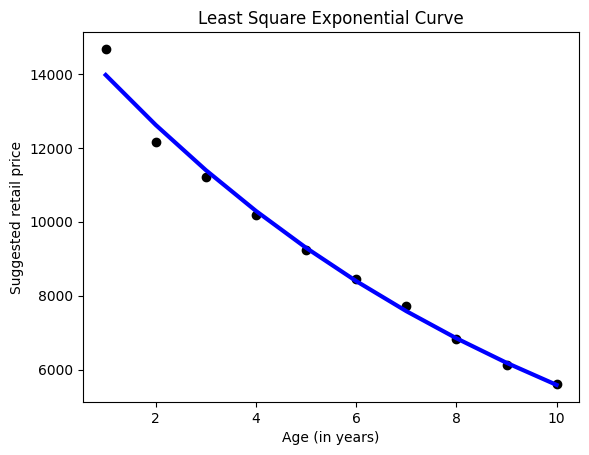

In [20]:
plt.scatter(x,y, color='black')
plt.plot(x, y_pred, color = 'blue', linewidth = 3)
plt.title('Least Square Exponential Curve')
plt.xlabel('Age (in years)')
plt.ylabel('Suggested retail price')
plt.style.use('default')

In [21]:
# Predict the price for the 11 years Toyota to be
b, a = fit(x,y)
price = a * np.exp(b*11)
print("Predict the price for the 11 years Toyota to be", price)

Predict the price for the 11 years Toyota to be 5041.764823396754


In [22]:
a * np.exp(b*0)

15474.512034532483

# 11.2.26

In [23]:
animal_data = pd.DataFrame({'locomotion':[360, 165, 21, 23, 11, 18, 18, 150, 45, 45, 18],
                               'play': [90, 105, 21, 26, 14, 28, 21, 105, 68, 75, 46]})

In [24]:
animal_data

,locomotion,play
0,360,90
1,165,105
2,21,21
3,23,26
4,11,14
5,18,28
6,18,21
7,150,105
8,45,68
9,45,75


In [25]:
x = animal_data.locomotion
y = animal_data.play


In [63]:
def fit (x, y):
        n = len(x)
        sum_x = sum(np.log10(x))
        sum_y = sum(np.log10(y))
        sum_xy = sum(np.log10(x) * np.log10(y))
        sum_xsquare = sum(np.log10(x)**2)
        b = (n * sum_xy - sum_x * sum_y)/(n* sum_xsquare - sum_x**2)
        log_a = (sum_y - b * sum_x)/n
        return b, 10**log_a, log_a

In [64]:
fit(x,y)

(0.5606186121007873, 5.415575418348566, 0.7336446082811537)

In [61]:
def predict(x, y):
    y_pred = []
    b, a = fit(x,y)
    for i in range(len(x)):
        pred =  a * (x**b)
            
    y_pred.append(pred)
    return np.reshape(y_pred,(-1,1))

In [59]:
y_pred = predict(x,y)
y_pred

array([[146.80990863],
       [ 94.79979091],
       [ 29.84732085],
       [ 31.40903386],
       [ 20.77154162],
       [ 27.37623611],
       [ 27.37623611],
       [ 89.8673364 ],
       [ 45.75792407],
       [ 45.75792407],
       [ 27.37623611]])

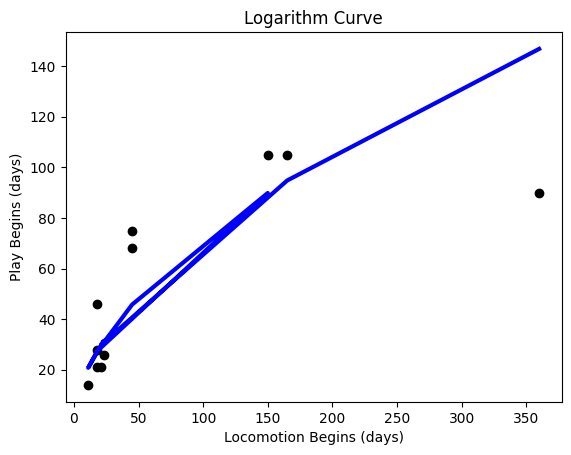

In [60]:
plt.scatter(x,y, color='black')
plt.plot(x, y_pred, color = 'blue', linewidth = 3)
plt.title('Logarithm Curve')
plt.xlabel('Locomotion Begins (days)')
plt.ylabel('Play Begins (days)')
plt.style.use('default')